In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from numpy import linalg as LA
from scipy.spatial import distance
import seaborn as sns

from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [82]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose

        
        
    
    def choice_k(self,X):
        #配列をリストに変換し、リストの中から任意の個数の重心の座標をランダムに抽出
        center_points = random.sample(X.tolist(),self.n_clusters)
    
        return center_points

 


    def assign_cluster(self,X,center_points):#Xは配列、center_pointsはリスト

        cluster_lst = []

        for data in X:
            min_distance = 999999  #重心と各データの距離を初期化

            for center in center_points:
                distance = np.sum((data - center)**2)#重心とデータのベクトルを同じ方向に向けて、合計することで２つのベクトルの距離を算出する
                eu_distance = LA.norm(distance)#ユークリッド距離を算出する

                if min_distance > eu_distance:#もし算出した距離が前回の重心より小さければ
                    min_distance = eu_distance#最小の距離を更新
                    cluster_label = center_points.index(center)#現状で最小の距離であるクラスタを記録

            cluster_lst.append(cluster_label)#全クラスタで試して最小だったクラスタをリストに格納=i番目のdataが所属するクラスタ確定

        return cluster_lst
    

    
    
    def move_center(self,X,cluster_lst):#Xは配列、cluster_lstはリスト
        #新しい重心のリスト
        new_center_points = []
        #各クラスタごとに属しているデータのインデックスを取得し、各クラスタごとに平均を算出することで新しい重心を取得する
        for i in range(self.n_clusters):

            #各クラスタに属しているデータのインデックスを取得
            index_lst = [index for index,clusta in enumerate(cluster_lst) if clusta==i]

            #各クラスタに属しているデータの数を取得
            index_count = len(index_lst)

            #各クラスタの合計値を初期化
            total = 0

            #各クラスタにおける合計値を算出
            for index in index_lst:
                total +=X[index]

            #算出した合計をクラスタに属しているデータの個数で割り、平均を出す
            new_center = total/index_count
            new_center = new_center.tolist()
            new_center_points.append(new_center)

        return new_center_points
    
    

    
    
    def calculate_SSE(self,X, center_points):
        #scipyで距離行列を作る
        eu_distance = distance.cdist(X, center_points, metric='euclidean')
        sse = eu_distance.min(axis=1).sum()

        return sse
    


    
    def fit(self,X):

        for time in range(self.n_init):
            
            #初期値変更ごとにシードを固定
            random.seed(time)

            #重心の初期値を設定
            default_center = self.choice_k(X)

            #ループで使う用の重心の初期値
            center_points = default_center

            
            #重心を決め、クラスタに割り当てることを繰り返す。
            for i in range(self.max_iter):

                #決められた重心を元にクラスタに割当て
                cluster_lst = self.assign_cluster(X,center_points)

                #そのクラスの中で新しい重心を探す。
                new_center_points = self.move_center(X,cluster_lst)

                #距離計算のためにlist➡︎array
                new_center_array = np.array(new_center_points)
                center_points_array = np.array(center_points)
                
                #前回の重心と更新した重心の差を求める
                error = np.sum((new_center_array - center_points_array)**2,axis=1)
                
                #ループで回すために重心を更新
                center_points = new_center_points
                
                
                #前回の重心と更新した重心の差が許容値以下になったら抜ける
                if all(self.tol > error):
                    break
            

            #verboseをTrueにした際は学習過程を出力
            if self.verbose is True: 
                print("SSE:{}".forrmat(sse))
        
        #最終的なsse
        sse = self.calculate_SSE(X,center_points)
        self.sse = sse
        
        return center_points

    
    def predict(self,X,center_points):
        
        return self.assign_cluster(X,center_points)
    
    
    def plot_clusters(self,center_points,cluster_lst):

        #各クラスタに属するデータのインデックス を取得する
        clusta0_index = [index for index,clusta in enumerate(cluster_lst) if clusta==0]
        clusta1_index = [index for index,clusta in enumerate(cluster_lst) if clusta==1]
        clusta2_index = [index for index,clusta in enumerate(cluster_lst) if clusta==2]
        clusta3_index = [index for index,clusta in enumerate(cluster_lst) if clusta==3]

        #取得したインデックスを用いて各クラスタに属するデータを割り当てる
        clusta0_data = [X[index] for index in clusta0_index]
        clusta1_data = [X[index] for index in clusta1_index]
        clusta2_data = [X[index] for index in clusta2_index]
        clusta3_data = [X[index] for index in clusta3_index]

        [plt.scatter(data[0],data[1],color="red") for data in clusta0_data]
        [plt.scatter(data[0],data[1],color="blue") for data in clusta1_data]
        [plt.scatter(data[0],data[1],color="purple") for data in clusta2_data]
        [plt.scatter(data[0],data[1],color="green") for data in clusta3_data]

        #重心は星印
        [plt.scatter(center[0],center[1],color="black",marker="*",s=500) for center in center_points]

        return plt.show()

# 【問題1】中心点の初期値を決める

入力されたデータから $K$ 個の中心点 $\mu_1$ から $\mu_K$ の初期値を決めるコードを作成してください。$K$ は指定したクラスタ数です。


最もシンプルな初期値の決定方法は、データ点 $X_n$ の中からランダムに $K$ 個選ぶことです。今回はこれを実装してください。


K-meansの学習結果は中心点 $\mu$ の初期値に影響を受けます。そのため、学習時には複数個の初期値で計算を行います。

In [8]:
def choice_k(self,X):
    #配列をリストに変換し、リストの中から任意の個数の重心の座標をランダムに抽出
    center_points = random.sample(X.tolist(),self.n_clusters)

    return center_points

In [5]:
#デバッグ
center_points = SKM.choice_k(X)
print(center_points)

[[-0.33533162578993436, 3.3901220048283296], [2.288098741298108, 0.12954181679932497], [1.6016183392412568, 0.9236363578360063], [0.7208675097620585, 3.7134712353871837]]


# 【問題2】SSEを求める関数の作成

クラスタ内誤差平方和（SSE, Sum of Squared Errors）を計算する関数を作成してください。

K-meansはこのSSEを最小化する $r_{nk}$ と $\mu_k$ を求めることが目的となります。

複数個の初期値で計算したクラスタリング結果から、どれを最終的に採用するかを決める際にこのSSEを求める関数を使用します。

## $$
SSE = \sum_{n=1}^N \sum_{k=1}^K r_{nk} \|X_n - \mu_k\|^2
$$

$n$ : データ点のインデックス


$k$ : クラスタのインデックス


$X_n$ : $n$番目のデータ点


$\mu_k$ : $k$番目の中心点


$r_{nk}$ : データ点$X_n$がクラスタ$k$に所属していたら1、そうでなければ0

In [54]:
def calculate_SSE(self,X, center_points):
    #scipyで距離行列を作る
    eu_distance = distance.cdist(X, center_points, metric='euclidean')
    sse = eu_distance.min(axis=1).sum()

    return sse

In [6]:
SKM.calculate_SSE(X,center_points)

178.59591536959056

# クラスタの割り当てと中心点の移動を繰り返す


K-meansの学習の基本は以下の2つのフェーズを繰り返すことです。


* 中心点 $\mu_k$ を固定した上で $SSE$ を最小化する クラスタの割り当て $r_{nk}$ を選ぶ。
* クラスタの割り当て $r_{nk}$ を固定した上で $SSE$ を最小化する 中心点 $\mu_k$ を選ぶ。

最初の中心点 $\mu_k$ は問題1で作成した初期値です。


順番に見ていきます。

# 【問題3】クラスタへの割り当て

全てのデータ点 $X_n$ を最も近い中心点 $\mu_k$ に割り当てるコードを作成してください。


K-menasにおける 近い とは点と点のユークリッド距離が小さくなることです。

ユークリッド距離とはピタゴラスの定理（三平方の定理）で求められるものですが、ベクトル $p,q$ に対しては以下の数式で表現できます。

## $$
\|q-p\| = \sqrt{(q-p)\cdot(q-p)}
$$

NumPyにはこの関数がnp.linalg.normとして用意されているため使用してください。


numpy.linalg.norm — NumPy v1.17 Manual


中心点 $\mu_k$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [11]:
def assign_cluster(self,X,center_points):#Xは配列、center_pointsはリスト

    cluster_lst = []

    for data in X:
        min_distance = 999999  #重心と各データの距離を初期化

        for center in center_points:
            distance = np.sum((data - center)**2)#重心とデータのベクトルを同じ方向に向けて、合計することで２つのベクトルの距離を算出する
            eu_distance = LA.norm(distance)#ユークリッド距離を算出する

            if min_distance > eu_distance:#もし算出した距離が前回の重心より小さければ
                min_distance = eu_distance#最小の距離を更新
                cluster_label = center_points.index(center)#現状で最小の距離であるクラスタを記録

        cluster_lst.append(cluster_label)#全クラスタで試して最小だったクラスタをリストに格納=i番目のdataが所属するクラスタ確定

    return cluster_lst

In [7]:
#デバッグ
cluster_lst = SKM.assign_cluster(X,center_points)

print(cluster_lst)

[3, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 1, 2, 0, 0, 1, 3, 0, 0, 1, 3, 0, 0, 3, 2, 1, 2, 0, 1, 2, 0, 3, 0, 2, 3, 0, 3, 0, 0, 0, 0, 0, 2, 0, 3, 3, 3, 2, 0, 0, 0, 0, 3, 2, 2, 3, 0, 2, 2, 3, 2, 3, 0, 0, 2, 3, 0, 2, 3, 0, 3, 3, 0, 0, 1, 2, 1, 0, 0, 3, 2, 0, 2, 2, 3, 3, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0]


# 【問題4】中心点の移動

中心点 $\mu_k$ を $k$ 番目のクラスタに割り当てられる全てのデータ点 $X_n$ の平均値（重心）に移動するコードを作成してください。


クラスタの割り当て $r_{nk}$ を固定した上でSSEを最小化していることになりますが、SSE自体を求める必要はありません。

In [13]:
def move_center(self,X,cluster_lst):#Xは配列、cluster_lstはリスト
    #新しい重心のリスト
    new_center_points = []
    #各クラスタごとに属しているデータのインデックスを取得し、各クラスタごとに平均を算出することで新しい重心を取得する
    for i in range(self.n_clusters):

        #各クラスタに属しているデータのインデックスを取得
        index_lst = [index for index,clusta in enumerate(cluster_lst) if clusta==i]

        #各クラスタに属しているデータの数を取得
        index_count = len(index_lst)

        #各クラスタの合計値を初期化
        total = 0

        #各クラスタにおける合計値を算出
        for index in index_lst:
            total +=X[index]

        #算出した合計をクラスタに属しているデータの個数で割り、平均を出す
        new_center = total/index_count
        new_center = new_center.tolist()
        new_center_points.append(new_center)

    return new_center_points

In [8]:
#デバッグ
center_points = SKM.move_center(X,cluster_lst)
center_points

[[-1.4706414645983474, 4.9444821911100965],
 [2.3719542995669145, 0.3896903004332279],
 [1.8440580913469518, 1.1895797576242717],
 [0.5529794267974089, 5.235312631108902]]

# 【問題5】繰り返し


クラスタへの割り当てと中心点の移動を繰り返すことで学習を行うコードを作成してください。


次のどれかの条件を満たしたらこれを止めます。


繰り返しが指定した回数に到達する。（雛形では引数max_iter）
中心点 $\mu_k$ と重心の差の合計が指定した許容値以下になる。（雛形では引数tol）

➡︎問題６で併せて作成しました

# 【問題6】異なる初期値で計算

問題5の繰り返しを、指定した回数初期値を変更して計算するコードを作成してください。回数は雛形では引数n_initで指定します。


複数計算した中でSSEが最小になったものが最終的な学習結果となるため、その時の中心点 $\mu_k$ を保持しておきます。

In [88]:
    def fit(self,X):

        for time in range(self.n_init):
            
            #初期値変更ごとにシードを固定
            random.seed(time)

            #重心の初期値を設定
            default_center = self.choice_k(X)

            #ループで使う用の重心の初期値
            center_points = default_center

            
            #重心を決め、クラスタに割り当てることを繰り返す。
            for i in range(self.max_iter):

                #決められた重心を元にクラスタに割当て
                cluster_lst = self.assign_cluster(X,center_points)

                #そのクラスの中で新しい重心を探す。
                new_center_points = self.move_center(X,cluster_lst)

                #距離計算のためにlist➡︎array
                new_center_array = np.array(new_center_points)
                center_points_array = np.array(center_points)
                
                #前回の重心と更新した重心の差を求める
                error = np.sum((new_center_array - center_points_array)**2,axis=1)
                
                #ループで回すために重心を更新
                center_points = new_center_points
                
                
                #前回の重心と更新した重心の差が許容値以下になったら抜ける
                if all(self.tol > error):
                    break
            

            #verboseをTrueにした際は学習過程を出力
            if self.verbose is True: 
                print("SSE:{}".forrmat(sse))
        
        #最終的なsse
        sse = self.calculate_SSE(X,center_points)
        self.sse = sse
        
        return center_points

In [92]:
#デバッグ
SKM = ScratchKMeans(n_clusters=4, n_init=10, max_iter=100, tol=1e-10, verbose=False)

center_points = SKM.fit(X)

print("====最終的な重心====")
print(center_points)

====最終的な重心====
[[-1.2681173257461038, 7.763782656002402], [1.9918690296485417, 0.9656107096107793], [-1.4793567922695052, 3.1171689610225974], [0.9257844652071334, 4.324757919503759]]


# 【問題7】推定


新たなデータに対してどのクラスタに所属するかの推定の際は、学習時の1つ目のフェーズと同じことを行います。

* データ点 $X_n$ と学習で決まった中心点 $\mu_k$ に対し、 $SSE$ を最小化する $r_{nk}$ を選ぶ。

具体的には次のことです。

* データ点 $X_n$ を最も近い $\mu_k$ に割り当てる。

In [ ]:
def predict(self,X,center_points):

    return self.assign_cluster(X,center_points)

In [93]:
SKM_pred = SKM.predict(X,center_points)
print("====最終的なクラスタ====")
print(cluster_lst)

====最終的なクラスタ====
[3, 0, 3, 3, 3, 3, 2, 0, 3, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 3, 0, 2, 1, 3, 2, 2, 3, 1, 1, 1, 0, 1, 1, 2, 3, 0, 1, 0, 2, 3, 2, 0, 2, 2, 0, 1, 2, 3, 3, 3, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 3, 1, 0, 2, 2, 1, 3, 0, 1, 3, 0, 3, 3, 2, 2, 1, 1, 1, 0, 2, 3, 1, 2, 1, 1, 3, 3, 3, 2, 3, 2, 2, 0, 0, 2, 0, 3]


In [80]:
#plotして分かれているか確認する
def plot_clusters(self,center_points,cluster_lst):

    #各クラスタに属するデータのインデックス を取得する
    clusta0_index = [index for index,clusta in enumerate(cluster_lst) if clusta==0]
    clusta1_index = [index for index,clusta in enumerate(cluster_lst) if clusta==1]
    clusta2_index = [index for index,clusta in enumerate(cluster_lst) if clusta==2]
    clusta3_index = [index for index,clusta in enumerate(cluster_lst) if clusta==3]

    #取得したインデックスを用いて各クラスタに属するデータを割り当てる
    clusta0_data = [X[index] for index in clusta0_index]
    clusta1_data = [X[index] for index in clusta1_index]
    clusta2_data = [X[index] for index in clusta2_index]
    clusta3_data = [X[index] for index in clusta3_index]

    [plt.scatter(data[0],data[1],color="red") for data in clusta0_data]
    [plt.scatter(data[0],data[1],color="blue") for data in clusta1_data]
    [plt.scatter(data[0],data[1],color="purple") for data in clusta2_data]
    [plt.scatter(data[0],data[1],color="green") for data in clusta3_data]

    #重心は星印
    [plt.scatter(center[0],center[1],color="black",marker="*",s=500) for center in center_points]

    return plt.show()

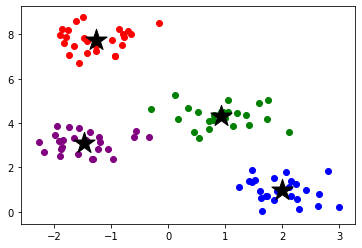

In [94]:
#デバッグ
SKM.plot_clusters(center_points,SKM_pred)

# 【問題8】エルボー法の実装

K-meansにおいて中心点の個数 $k$ は人為的に決める必要がありますが、その判断方法としてエルボー法があります。

エルボー法により中心点の個数 $k$ を検討するためのコードを作成してください。


SSEを縦軸、クラスタ数 $k$ を横軸にした折れ線グラフを表示します。

このためにK-meansのインスタンスからはSSEを取得できるようにしてください。

In [95]:
def plot_elbow(X,n_clusters):
    #クラスタ数ごとのsseを保存するリスト
    sse_lst = []
    #指定したクラスタ数だけ試行する※クラスタ０はないため１から。指定したクラスタ数にするため＋１して０の分を補う
    for num in range(1,n_clusters+1):
        #各クラスタ数ごとにインスタンス作成
        SKM = ScratchKMeans(n_clusters=num, n_init=10, max_iter=100, tol=1e-10, verbose=False)
        #各クラスタ数ごとにsseを求める
        SKM.fit(X)
        sse_lst.append(SKM.sse)

    plt.plot([num for num in range(1,n_clusters+1)],sse_lst)
    
    return plt.show()

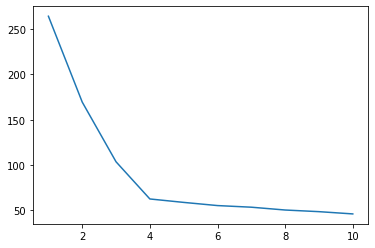

In [96]:
plot_elbow(X,10)

# 【問題9】（アドバンス課題）シルエット図

kを決める助けになるものとしてシルエット図もあります。シルエット図を表示するコードを作成してください。

In [117]:
from sklearn.metrics import silhouette_samples
from matplotlib import cm


def plot_silhouette(X,pred):
    # predの要素の中で重複を無くす
    cluster_labels = np.unique(pred)       
    # predの要素数を算出する
    n_clusters=cluster_labels.shape[0]     

    # シルエット係数を算出
    silhouette_vals = silhouette_samples(X,pred,metric='euclidean')  # サンプルデータ, クラスター番号、ユークリッド距離でシルエット係数を算出
    y_ax_lower, y_ax_upper= 0,0
    yticks = []

    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[pred==c]      
        c_silhouette_vals.sort()
        
        # サンプルの個数をクラスターごとに足し上げてy軸の最大値を決定
        y_ax_upper += len(c_silhouette_vals)    
        
        # 色の値を作る
        color = cm.jet(float(i)/n_clusters)  
        
        # 水平の棒グラフのを描画（底辺の範囲を指定）
        plt.barh(range(y_ax_lower,y_ax_upper),            
                         c_silhouette_vals,               # 棒の幅（1サンプルを表す）
                         height=1.0,                      # 棒の高さ
                         edgecolor='none',                # 棒の端の色
                         color=color)                     # 棒の色
        
        # クラスタラベルの表示位置を追加
        yticks.append((y_ax_lower+y_ax_upper)/2)          
        
        # 底辺の値に棒の幅を追加
        y_ax_lower += len(c_silhouette_vals)              
        
        # シルエット係数の平均値
    silhouette_avg = np.mean(silhouette_vals)     
    
    # 係数の平均値に破線を引く 
    plt.axvline(silhouette_avg,color="red",linestyle="--")    
    
    # クラスタレベルを表示
    plt.yticks(yticks,cluster_labels + 1)                     
    plt.show()

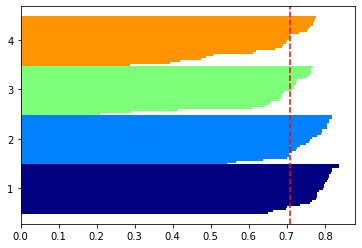

In [118]:
plot_silhouette(X,SKM_pred)

➡︎シルエット図からはなんとも言えないが、エルボー図から4つが最適なクラスタ数だと考えられる

=======================================================================================================================
# 3.クラスタ分析

卸売業者のデータ分析

クラスタリングを利用法を学ぶために、Wholesale customers Data Setを使用します。


UCI Machine Learning Repository: Wholesale customers Data Set


Data Folderの中からWholesale customers data.csvをダウンロードしてください。

これはポルトガルのリスボンにある卸売業者（wholesale）が顧客から集めたデータです。

中身は各顧客が年間でミルクや食料品を何ユーロ購入しているかというデータになっています。

顧客は小売店やレストランです。RegionとChannelは取り覗き、金額のデータでK-meansを利用します。


Fresh	・・・生鮮食品

Milk　　　・・・牛乳

Grocery	　・・・食糧雑貨

Frozen	　冷凍食品

Detergents_Paper	・・・衛生用品

Delicassen　　・・・惣菜

In [63]:
data_set = pd.read_csv("/Users/nobu/Documents/データセット/Wholesale customers data.csv")
pd.set_option("display.max_rows",500)

In [64]:
data = data_set.iloc[:,2:]
#data

# 次元削減
金額に関する特徴量は6個ありますが、可視化するために次元削減を行います。

これに関してはscikit-learnによるPCAのサンプルコードを用意したので利用してください。

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


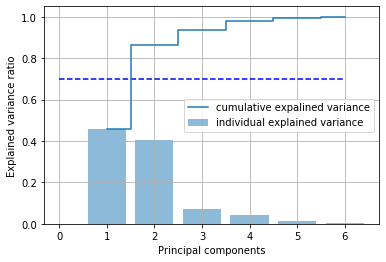

In [107]:
#《PCAのサンプルコード》
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

#《PCAの分散説明率を表示するコードサンプル》
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

# 【問題10】クラスタ数kの選択

最適だと思われるクラスタ数 $k$ を選択してください。

エルボー法やシルエット図を活用する他、人間が後々どう利用したいのかも選択に関わってきます。

選択した上で、なぜそれを選んだか説明してください。



In [125]:
from sklearn.cluster import KMeans
#インスタンスを作成し、学習・推定させる
KM = KMeans(n_clusters=10,random_state=42)
km_pred = KM.fit_predict(data_pca)

In [126]:
def plot_elbow2(X,num):
    #本家KMeansではSSEはinertia_として保存されている
    inertia_lst = []
    for i  in range(1,num+1):
        # k-means++法により、各クラスタの重心の初期値を互いに離れた位置に配置する
        km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
        # クラスタリングを実行し、inertiaを取得。リストに追加
        km.fit(X)                        
        inertia_lst.append(km.inertia_)   

    plt.plot(range(1,num+1),inertia_lst,marker='o')

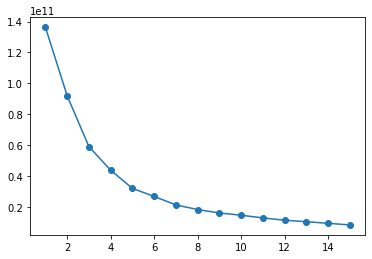

In [127]:
plot_elbow2(data_pca,15)

4~6あたりだと考えられる。➡︎シルエット図でこの辺りを描画

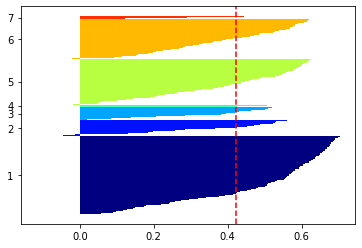

In [136]:
KM = KMeans(n_clusters=7,random_state=42)
km_pred = KM.fit_predict(data_pca)
plot_silhouette(data_pca,km_pred)

5と6が同じくらい。
このデータは各顧客が６種類の商品(Fresh、Milk、Grocery、Frozen、Detergents_Paper、Delicassen)を、それぞれいくら購入しているかのデータである。
そのためクラスタ化するのも商品のの種類と同じ６種類が好ましいと考えられる、、、（？）

# 【問題11】既知のグループとの比較

RegionとChannelはK-meansに使用しなかったが、これれらは既知のグループです。

クラスタとこれら既知のグループがどう違うかを確認し、説明してください。まずはそれぞれを可視化してください。




In [134]:
#問題１０より６つのクラスタで分けるのが好ましいと考えられるため6つに分ける
KM = KMeans(n_clusters=6,random_state=42)
km_pred = KM.fit_predict(data_pca)

#本家KMeansは.labels_で推定したラベルを呼び出せる
labels =KM.labels_
print(labels)

[5 5 5 0 4 0 0 5 0 5 5 0 4 4 4 0 5 0 4 0 4 0 4 2 4 4 0 0 2 1 4 0 4 4 0 5 4
 5 5 1 4 4 5 2 5 2 2 3 5 2 0 0 1 5 4 0 2 5 0 5 0 3 0 5 0 2 0 4 0 0 4 4 0 4
 5 4 0 2 0 0 0 5 5 4 0 3 3 1 0 4 0 0 2 4 5 0 5 0 0 0 5 5 5 1 0 4 5 5 5 2 0
 5 4 0 4 0 0 0 4 0 4 0 0 5 4 1 4 4 0 1 0 0 0 0 0 0 5 5 0 0 4 4 1 0 4 2 0 0
 0 4 4 0 4 0 0 5 5 4 5 5 5 0 4 2 5 2 5 0 0 0 5 2 5 5 0 5 1 0 0 0 0 1 5 1 0
 0 0 5 5 5 4 0 0 5 0 4 4 5 0 0 2 2 4 0 0 2 0 0 0 5 4 2 0 5 5 5 2 4 5 0 0 5
 0 0 0 0 4 0 0 0 0 0 4 0 4 0 0 4 0 1 4 4 4 0 5 5 0 0 4 0 0 2 0 4 5 4 0 0 1
 1 0 0 4 0 5 5 5 4 5 0 0 0 5 1 0 0 4 0 0 4 0 0 1 4 1 1 0 4 4 1 0 0 0 5 4 0
 4 0 5 0 4 2 5 5 2 5 2 4 0 5 0 4 5 0 0 5 0 0 0 2 0 0 4 0 4 1 0 0 4 0 0 2 4
 3 4 4 0 0 0 0 5 5 5 2 0 5 5 4 0 2 0 2 0 5 4 0 4 5 5 0 4 0 0 0 0 5 0 0 4 0
 1 4 0 4 0 0 5 1 0 5 4 4 4 0 5 0 0 4 0 0 0 0 0 4 0 0 5 0 0 0 0 4 4 4 4 0 4
 5 0 0 0 0 5 0 0 5 5 5 5 0 5 4 4 4 4 0 5 4 0 0 5 0 4 0 4 4 1 2 0 0]


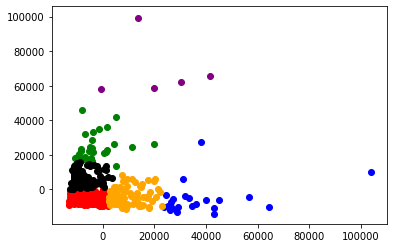

In [133]:
#散布図を描画
color = ['red', 'blue', 'green','purple','orange','black']
for i in range(6):
    p = data_pca[KM.labels_ == i, :]
    plt.scatter(p[:, 0], p[:, 1],color = color[i])

plt.show()

In [18]:
known_group = data_set.iloc[:,:2]
#known_group

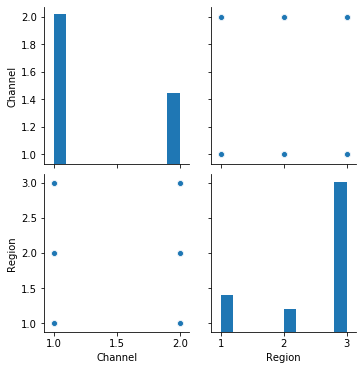

In [122]:
sns.pairplot(known_group)

➡︎問題１０で扱った６つの特徴量とは違い、すでにChannel	は２つ、Regionは３つに分かれている。


６つのクラスタはそれぞれ購入金額であり、比例尺度である。


そして既知のグループの二つが、名前の通り経路と地域であるとするなら、これら二つは名義尺度である。

# 【問題12】卸売業者にとって有益な情報


卸売業者にとって有益な情報を探し出し文章にまとめてください。


《ヒント》


前処理を行う前のデータを使い、各クラスタの要約統計量を見るなどしてみましょう。

また、PCAで次元削減したデータに対してK-meansを使用しましたが、

6個の特徴量をそのまま使ったり、一部の特徴量のみを使ったりということも試してみてください。

既知のグループとの比較結果も参考にしてください。


条件ごとにデータを見る際にはPandasのgroupbyが便利です。


pandas.DataFrame.groupby — pandas 0.23.4 documentation

In [66]:
#データにどのクラスタに属するのについての情報を追加
data_set["Cluster"] = labels
#data_set

In [180]:
#データの概観
data_set.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0
Cluster,440.0,1.063636,0.915842,0.0,0.00,1.0,1.00,5.0


分析１：

➡︎生鮮食品と食糧雑貨と牛乳の購入される金額が特に多い

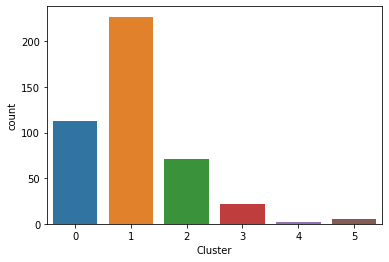

In [181]:
#各クラスタの数
sns.countplot(data_set["Cluster"])

分析２：

➡︎各クラスタ間で属している数が違う。多いクラスタと少ないクラスタの差が顕著

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011,0.318647
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212,0.021815
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.123670
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.536965
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.577312
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,0.095507
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.562842
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.203122
Cluster,0.318647,0.021815,0.123670,0.536965,0.577312,0.095507,0.562842,0.203122,1.000000


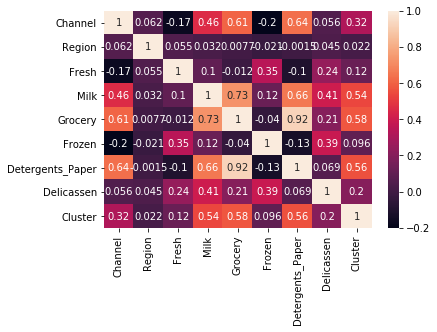

In [182]:
#相関関係
data_corr = data_set.corr()
display(data_corr)
sns.heatmap(data_corr,annot=True)

分析３

➡︎衛生用品(Detergents_Paper)と食糧雑貨(Grocery)に強い相関が見られた➡︎この二つを多く買う顧客がいると考えられる。

In [20]:
#各クラスタをエンコーディングして各クラスタと各特徴量の相関を算出
from sklearn.preprocessing import OneHotEncoder
data_set['Cluster'] = data_set['Cluster'].astype(str)
df_one_hot_encoded = pd.get_dummies(data_set)
#display(df_one_hot_encoded)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011,-0.160991,-0.265161,0.582589,-0.113755,-0.046646,0.155312
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212,0.004173,-0.001777,-0.044463,0.054608,-0.003773,0.035601
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.400183,-0.518459,-0.235852,0.690981,0.121859,0.115441
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,-0.160154,-0.312066,0.440003,-0.041976,0.225222,0.547755
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,-0.177205,-0.373925,0.571646,-0.065889,0.063689,0.604491
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,0.111182,-0.145916,-0.126452,0.133591,0.635855,-0.009638
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,-0.216177,-0.312998,0.566901,-0.093131,-0.030166,0.609907
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.023832,-0.190511,0.064324,0.071628,0.605742,0.045060
Cluster_0,-0.160991,0.004173,0.400183,-0.160154,-0.177205,0.111182,-0.216177,0.023832,1.000000,-0.606860,-0.257858,-0.134862,-0.039723,-0.063024
Cluster_1,-0.265161,-0.001777,-0.518459,-0.312066,-0.373925,-0.145916,-0.312998,-0.190511,-0.606860,1.000000,-0.452834,-0.236835,-0.069759,-0.110679


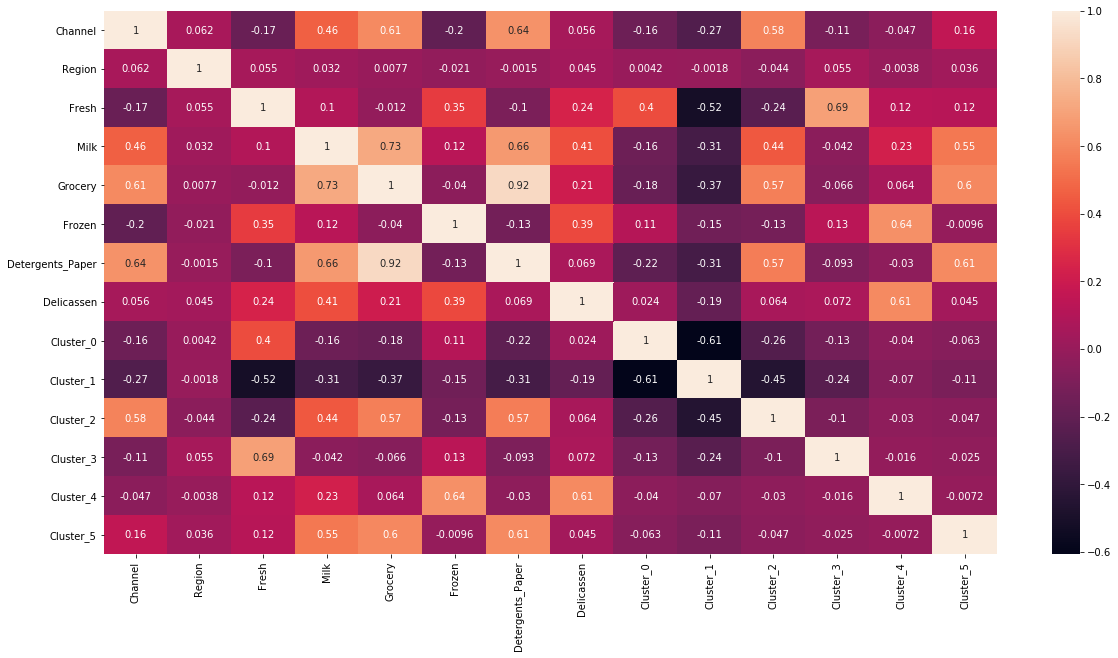

In [177]:
plt.figure(figsize=(20, 10))
encode_corr = df_one_hot_encoded.corr()
display(encode_corr)
sns.heatmap(encode_corr,annot=True)

分析４

➡︎各クラスタと特徴量間に特に強い相関はない。

しかし、分析３で見られた衛生用品（Detergents_Paper）と食糧雑貨(Grocery)がクラスタ２と同じ相関係数を示していた（0.57）

決して高い相関ではないため断定はできないが、この二つを買うような顧客のクラスタはクラスタ２に属するのかもしれない。



In [67]:
cluster_0 = data_set[data_set["Cluster"].isin(["0"])].reset_index(drop=True)
cluster_0["unit_price"] = cluster_0.iloc[:,2:7].sum(axis=1)
#display(cluster_0)
cluster_1 = data_set[data_set["Cluster"].isin(["1"])].reset_index(drop=True)
cluster_1["unit_price"] = cluster_1.iloc[:,2:7].sum(axis=1)
#display(cluster_1)
cluster_2 = data_set[data_set["Cluster"].isin(["2"])].reset_index(drop=True)
cluster_2["unit_price"] = cluster_2.iloc[:,2:7].sum(axis=1)
#display(cluster_2)
cluster_3 = data_set[data_set["Cluster"].isin(["3"])].reset_index(drop=True)
cluster_3["unit_price"] = cluster_3.iloc[:,2:7].sum(axis=1)
#display(cluster_3)
cluster_4 = data_set[data_set["Cluster"].isin(["4"])].reset_index(drop=True)
cluster_4["unit_price"] = cluster_4.iloc[:,2:7].sum(axis=1)
#display(cluster_4)
cluster_5 = data_set[data_set["Cluster"].isin(["5"])].reset_index(drop=True)
cluster_5["unit_price"] = cluster_5.iloc[:,2:7].sum(axis=1)
#display(cluster_5)

In [232]:
print("クラスタ0の平均顧客単価は{:.0f}".format(cluster_0["unit_price"].sum()/cluster_0.shape[0]))
print("クラスタ1の平均顧客単価は{:.0f}".format(cluster_1["unit_price"].sum()/cluster_1.shape[0]))
print("クラスタ2の平均顧客単価は{:.0f}".format(cluster_2["unit_price"].sum()/cluster_2.shape[0]))
print("クラスタ3の平均顧客単価は{:.0f}".format(cluster_3["unit_price"].sum()/cluster_3.shape[0]))
print("クラスタ4の平均顧客単価は{:.0f}".format(cluster_4["unit_price"].sum()/cluster_4.shape[0]))
print("クラスタ５の平均顧客単価は{:.0f}".format(cluster_5["unit_price"].sum()/cluster_5.shape[0]))

クラスタ0の平均顧客単価は34597
クラスタ1の平均顧客単価は17561
クラスタ2の平均顧客単価は49431
クラスタ3の平均顧客単価は66566
クラスタ4の平均顧客単価は131504
クラスタ５の平均顧客単価は163146


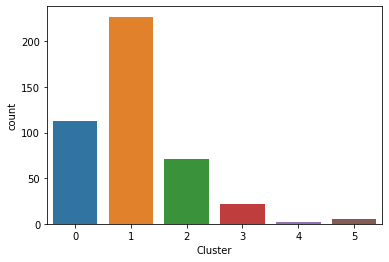

In [228]:
#各クラスタの数（再掲）
sns.countplot(data_set["Cluster"])

分析５：

➡︎分析４にて言及したクラスタ２は、各クラスタにおける顧客数TOP３の中で最も顧客単価が高かった。

# 考察：

分析３・４より仮説として、クラスタ２に属する人を

「衛生用品（Detergents_Paper）と食糧雑貨(Grocery)を多く買う人」

とし、そんな顧客層を例えば一人暮らしの女性と仮定するなら(衛生用品や食糧雑貨に何が該当するか分からないためなんとも言えないが)、

分析５より顧客単価が高いことが明らかになっており、このターゲット向けのキャンペーンを打ち出すことは効果的なのかもしれない。

またこのクラスタは現状顧客数も多くないため、このクラスタに向けたキャンペーンを打ち出すことで他のスーパーとの差別化が図れ、

このクラスタに属する人が近隣の他のスーパーではなく、この店を利用するきっかけになるかもしれない。・・・（飛躍気味ですが、、、）

# 【問題13】（アドバンス課題）他の手法の調査

今回扱ったK-means以外に非階層クラスタリングで有名な手法としては DBSCAN 、
PCA以外に次元削減手法で有名な手法としては t-SNE や LLE があります。


## DBSCAN

### メリット
* k-meansと違って，最初にクラスタ数を決めなくてよい
* とがったクラスタでも分類できる。クラスタが球状であることを前提としない
* パラメータがεとminPtsという二つでよい。また，パラメータの範囲も判断しやすい。

### デメリット
* border点の概念が微妙で，データによりどのクラスタに属するか変わる可能性がある。
* 距離の計算方法により，精度が変わる。
* データが密集していると適切にεとminPtsを決めるのが難しい。ほとんどの点を一つのクラスタに分類してしまう場合もデータがわからないとεを決めるのが難しい。
* 次元が大きくなると次元の呪いの影響を受ける


* t-SNE、LLEのメリット・デメリット


## t-SNE

### メリット
* 線形では表現できない関係も学習して次元削減を行える
* 可視化に特化しており、PCAなどと比較してより複雑なデータでも有効に働きやすい

### デメリット
* うまくいくことが保証されているのは2or3次元への圧縮のみ
* 局所構造が次元の呪いの影響を受けやすい
* 最適化アルゴリズムの収束性が保証されていない


## LLE

### メリット
* 元々の空間で近かったものは、同じように近い場所に配置され、多様体をそのまま取り出してきたような結果になる
* LLEは最適解が保証されている(ただしKはハイパーパラメータ)

### デメリット
* 複雑なデータになるとうまく可視化できない

# 【問題14】（アドバンス課題）t-SNEとDBSCANの利用

Wholesale customersのデータに対して、PCAではなく、 t-SNE を用いて次元削減をしてください。

さらにK-meansではなく、 DBSCAN を用いてクラスタリングしてください。


そのクラスタリング結果をPCA+kmeansの場合の結果と比較してみましょう。実装にはscikit-learnを用いてください。


sklearn.manifold.TSNE — scikit-learn 0.20.2 documentation


sklearn.cluster.DBSCAN — scikit-learn 0.20.2 documentation


《パラメーターチューニング》


これらはK-meansやPCAに比べパラメーターチューニングが難しい手法です。

scikit-learnのドキュメントと共に論文も参考にしながらパラメータの意味を確認することも大切になります。



クラスタ:[-1  0  1  2  3  4  5  6  7  8  9]


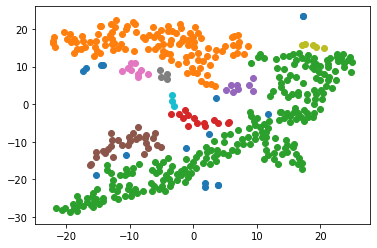

In [61]:
#  t-SNE を用いて次元削減
tsne = TSNE(n_components = 2)
data_tsne = tsne.fit_transform(data)

# DBSCAN を用いてクラスタリング
dbscan = DBSCAN(eps=2, min_samples=3)
tsne_pred = dbscan.fit_predict(data_tsne)
cluster = np.unique(tsne_pred)

print("クラスタ:{}".format(cluster))

#散布図描画
for i in range(len(cluster)):
    data_i = data_tsne[np.where(tsne_pred==cluster[i])[0]]
    plt.scatter(data_i[:, 0], data_i[:, 1])

plt.show()